In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from imutils.contours import sort_contours
import imutils

In [ ]:


train_path = "/content/extracted_images"

train_datagen = ImageDataGenerator(
    rescale = 1./255, 
    shear_range = 0.2, 
    zoom_range = 0.2,
    validation_split = 0.25
)
train_set = train_datagen.flow_from_directory(
    train_path, 
    target_size = (45, 45), 
    color_mode = 'grayscale',
    batch_size = 32,
    class_mode = 'categorical',
    classes = ['+', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'M', 'N', 'R', 'X', 'cos', 'e', 'gt', 'infty', 'log', 'lt', 'neq', 'pi', 'sin', 'tan','y'],
    shuffle = True,
    subset='training',
    seed = 123
)

test_set = train_datagen.flow_from_directory(
    train_path, 
    target_size = (45, 45), 
    color_mode = 'grayscale',
    batch_size = 32,
    class_mode = 'categorical',
    classes =  ['+', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'M', 'N', 'R', 'X', 'cos', 'e', 'gt', 'infty', 'log', 'lt', 'neq', 'pi', 'sin', 'tan','y'],
    shuffle = True,
    subset='validation',
    seed = 123
)



Found 169096 images belonging to 27 classes.
Found 56354 images belonging to 27 classes.


In [ ]:
def symbol(ind):
    symbols = ['+', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'M', 'N', 'R', 'X', 'cos', 'e', 'gt', 'infty', 'log', 'lt', 'neq', 'pi', 'sin', 'tan','y']
    symb = symbols[ind.argmax()]
    return symb

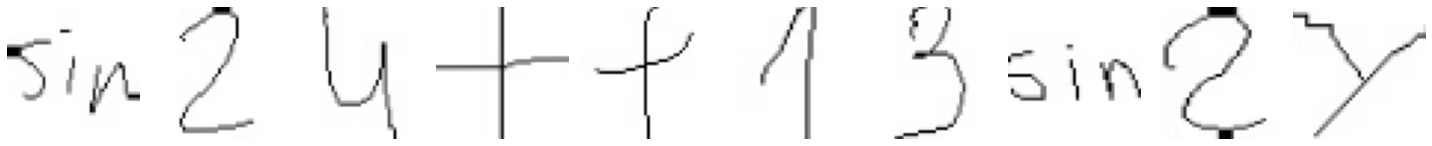

sin
2
4
+
+
1
3
sin
2
y


In [ ]:
imgs, labels = next(train_set)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize = (20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(cv.cvtColor(img, cv.COLOR_RGB2BGR))
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
plotImages(imgs)
for i in range(10):
    print(symbol(labels[i]))

In [ ]:


model = tf.keras.models.Sequential()

# First Convolutional Block
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(45, 45, 1)))
model.add(tf.keras.layers.MaxPool2D(strides=2))

# Second Convolutional Block
model.add(tf.keras.layers.Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(strides=2))

# Classifier Head
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(84, activation='relu'))
model.add(tf.keras.layers.Dense(27, activation='softmax'))



In [ ]:
adam = tf.keras.optimizers.Adam(lr = 5e-4)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 45, 45, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 18, 48)        38448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 48)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3888)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               995584    
_________________________________________________________________
dense_1 (Dense)              (None, 84)                2

In [ ]:


model.fit(train_set, validation_data = test_set, epochs = 20)



Epoch 1/20
5285/5285 [==============================] - 178s 28ms/step - loss: 0.3462 - accuracy: 0.9010 - val_loss: 0.1425 - val_accuracy: 0.9573
Epoch 2/20
5285/5285 [==============================] - 134s 25ms/step - loss: 0.1189 - accuracy: 0.9650 - val_loss: 0.0967 - val_accuracy: 0.9704
Epoch 3/20
5285/5285 [==============================] - 134s 25ms/step - loss: 0.0851 - accuracy: 0.9741 - val_loss: 0.0793 - val_accuracy: 0.9765
Epoch 4/20
5285/5285 [==============================] - 137s 26ms/step - loss: 0.0640 - accuracy: 0.9804 - val_loss: 0.0551 - val_accuracy: 0.9830
Epoch 5/20
5285/5285 [==============================] - 131s 25ms/step - loss: 0.0531 - accuracy: 0.9839 - val_loss: 0.0516 - val_accuracy: 0.9844
Epoch 6/20
5285/5285 [==============================] - 133s 25ms/step - loss: 0.0434 - accuracy: 0.9865 - val_loss: 0.0487 - val_accuracy: 0.9851
Epoch 7/20
5285/5285 [==============================] - 130s 25ms/step - loss: 0.0387 - accuracy: 0.9884 - val_loss: 0

In [ ]:
val_loss, val_accuracy = model.evaluate(test_set)
print(val_loss,val_accuracy)

1762/1762 [==============================] - 32s 18ms/step - loss: 0.0193 - accuracy: 0.9950
0.019268112257122993 0.9949604272842407


In [ ]:
model.save('deModel_v4ultramin')

INFO:tensorflow:Assets written to: deModel_v4ultramin/assets


In [ ]:
def prediction(image_path):
    img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap = 'gray')
    img = cv.resize(img,(45, 45))
    norm_image = cv.normalize(img, None, alpha = 0, beta = 1, norm_type = cv.NORM_MINMAX, dtype = cv.CV_32F)
    norm_image = norm_image.reshape((norm_image.shape[0], norm_image.shape[1], 1))
    case = np.asarray([norm_image])
    pred = model.predict([case])
    
    return 'Prediction: ' + symbol(pred)

Prediction: +


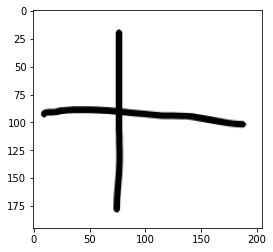

In [ ]:
image1_path = '/content/testplus.png'
p1 = prediction(image1_path)
print(p1)

Ignore this below code i dont think this works 

In [ ]:
image = cv2.imread('/content/test1.png')
#image = cv2.resize(image,(300,300))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
# perform edge detection, find contours in the edge map, and sort the
# resulting contours from left-to-right
edged = cv2.Canny(blurred, 30, 150)
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sort_contours(cnts, method="left-to-right")[0]
chars=[]
for c in cnts:
    # compute the bounding box of the contour
    (x, y, w, h) = cv2.boundingRect(c)
    # filter out bounding boxes, ensuring they are neither too small
    # nor too large
    if w*h>1200:
        # extract the character and threshold it to make the character
        # appear as *white* (foreground) on a *black* background, then
        # grab the width and height of the thresholded image
        roi = gray[y:y + h, x:x + w]
        chars.append(prediction(roi))
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

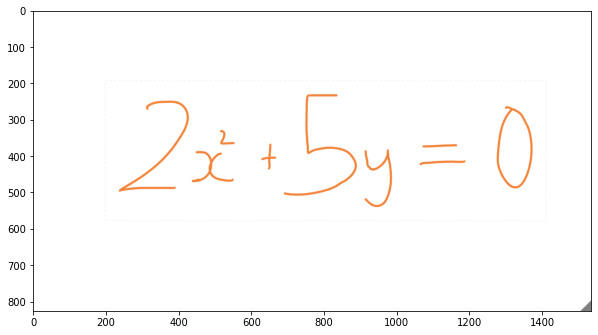

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(image)

In [ ]:
chars

[]

In [ ]:
!unrar x /content/drive/MyDrive/input/data.rar

Streaming output truncated to the last 5000 lines.
Extracting  extracted_images/z/exp75725.jpg                               98%  OK 
Extracting  extracted_images/z/exp75743.jpg                               98%  OK 
Extracting  extracted_images/z/exp75756.jpg                               98%  OK 
Extracting  extracted_images/z/exp75762.jpg                               98%  OK 
Extracting  extracted_images/z/exp75782.jpg                               98%  OK 
Extracting  extracted_images/z/exp75787.jpg                               98%  OK 
Extracting  extracted_images/z/exp75789.jpg                               98%  OK 
Extracting  extracted_images/z/exp75831.jpg                               98%  OK 
Extracting  extracted_images/z/exp75832.jpg                               98%  OK 
Extracting  extracted_images/z/exp75834.jpg                               98%  OK 
Extracting  extracted_images/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!zip -r '/content/deModel_v4ultramin.zip' '/content/deModel_v4ultramin'

  adding: content/deModel_v4ultramin/ (stored 0%)
  adding: content/deModel_v4ultramin/assets/ (stored 0%)
  adding: content/deModel_v4ultramin/saved_model.pb (deflated 88%)
  adding: content/deModel_v4ultramin/variables/ (stored 0%)
  adding: content/deModel_v4ultramin/variables/variables.data-00000-of-00001 (deflated 29%)
  adding: content/deModel_v4ultramin/variables/variables.index (deflated 65%)
  adding: content/deModel_v4ultramin/keras_metadata.pb (deflated 91%)
